# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from ml.visualization import plot_confusion_matrix, plot_learning_curve


# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(0)  # Para mayor determinismo

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

El departamento de credito de consumidor de un banco quiere automatizar el proceso de decision para arobar lineas de capital de credito para el hogar. Para hacer esto ellos van a seguir las recomendaciones del acto de oportunidad de credito igualitario para crear un buen modelo de scoring de credito empirico y estadistico. El modelo se va a basar de datos de solicitantes de credito aprobados recientes a lo largo del proceso actual de suscripcion de credito. El modelo sera contruido desde herramientas de modelado predictivo, pero el modelo creado debera ser lo suficientemente interpretable para proveer una razon de reprobacion. 

El conjunto de datos de equidad de la vivienda contiene la base y performance de prestamo para 5960 prestamos para hogares recientes. El target (BAD) es una variable binaria que indica si el aplicante incumplio en el pago o fue seriamente delincuente. Los casos adversos se dieron en 1189 oportunidades. Para cada suscriptor se registraron 12 variables de entrada.

TARGET : 1 = el cliente fallo en el pago 0 = credito devuelto
LOAN : Monto de credito requerido
MORTDUE : Cantidad debida en la hipoteca existente
VALUE : Valor de la propiedad actual
YOJ : A;os de trabajo presente
DEROG : Numero de informes de derogacion
DELINQUENT : Numero de lineas de credito delinquido
CLAGE : A;os de lineas de operacion mas antigua en meses
NINQ : Numero de lineas de creditos recientes
CLNO : Numero de lineas de credito
DEBTINC : Debt to income ratio

Conjunto de datos de préstamo basado en el conjunto de datos de Kaggle Home Equity
Disponible en: https://www.kaggle.com/ajay1735/hmeq-data

Contexto

El departamento de crédito al consumidor de un banco quiere automatizar el proceso de toma de decisiones para la aprobación de líneas de crédito con garantía hipotecaria. Para hacer esto, seguirán las recomendaciones de la Ley de Igualdad de Oportunidades de Crédito para crear un modelo de puntuación de crédito empíricamente derivado y estadísticamente sólido. El modelo se basará en los datos recopilados de solicitantes recientes que recibieron crédito a través del proceso actual de suscripción de préstamos. El modelo se construirá a partir de herramientas de modelado predictivo, pero el modelo creado debe ser lo suficientemente interpretable para proporcionar una razón para cualquier acción adversa (rechazos).

 Contenido

El conjunto de datos sobre el valor acumulado de la vivienda (HMEQ) contiene información de línea de base y rendimiento del préstamo para 5,960 préstamos recientes sobre el valor acumulado de la vivienda. El objetivo (BAD) es una variable binaria que indica si un solicitante eventualmente dejó de cumplir con los pagos o si estaba seriamente en mora. Este resultado adverso ocurrió en 1.189 casos (20%). Para cada solicitante, se registraron 12 variables de entrada.

Atributos

Nombre Descripción
Etiqueta de OBJETIVO: 1 = el cliente incumplió con el préstamo - 0 = el préstamo se pagó
PRÉSTAMO Cantidad de la solicitud de préstamo
MORTDUE Monto adeudado en la hipoteca existente
VALUE Valor de la propiedad actual
YOJ Años en el trabajo actual
DEROG Número de informes despectivos principales
DELINQ Número de líneas de crédito morosas
CLAGE Edad de la línea comercial más antigua en meses
NINQ Número de líneas de crédito recientes
CLNO Número de líneas de crédito
DEBTINC Relación deuda / ingresos


1 - El dataset es de un conjunto de datos con informacion de 5960 prestamos recientes sobre el valor acumulado de la vivienda.

2 - Se debe predecir si el solicitante puede o no defaultear el credito o incurrir en mora.

3 - TARGET: Variable binaria que indica si el solicitante cumplio o incumplio con el credito.
    PRESTAMO: Cantidad solicitada 
    MORTDUE: Monto adeudado en la hipoteca existente
    VALOR: Valor actual de la propiedad
    YOJ: A;os en el trabajo actual
    DEROG: Numero de informes de derogacion principales
    DELINQ: Numero de lineas de credito morosas
    CLAGE: Edad de la linea comercial mas antigua en meses
    NINQ: Numero de lineas de credito recientes
    CLNO: Numero de lineas de credito
    DEBTINC: Relacion deuda/ingresos
    
4 - Haciendo un analisis rapido, tendria en cuenta las siguientes variables principalmente: DELINQ (se puede ver que aumenta cuando BAD = 1), LOAN (se tiene en cuenta el monto que se pidio, mientras mayor mas probabilidad de mora) y DEBTINC (mientras mayor relacion, mayor probabilidad de mora).

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [12]:
from sklearn.linear_model import SGDClassifier

Accuracy: 0.8140161725067385, Presicion: [0.83888889 0.        ], recall: [0.96485623 0.        ], fscore: [0.897474 0.      ], support: [313  58]


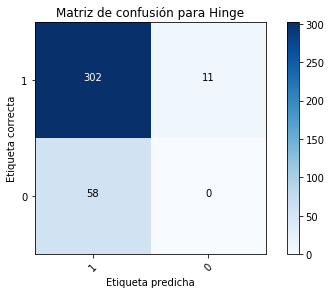

In [13]:
np.random.seed(1)
clf = SGDClassifier()
#clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=100, shuffle=True)
clf.fit(X_train, y_train)

y_predecido = clf.predict(X_test)

accuracy = len(y_predecido[y_predecido == y_test])/len(y_predecido) 
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predecido)

print("Accuracy: {a}, Presicion: {p}, recall: {r}, fscore: {f}, support: {s}".format(a = accuracy, p = precision, r = recall, f = fscore, s = support))
plot_confusion_matrix(confusion_matrix(y_test, y_predecido),classes=[1, 0], title="Matriz de confusión para Hinge")

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

/home/adelarja/miniconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/adelarja/miniconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/adelarja/miniconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/adelarja/miniconda3/envs/diplodatos/lib/python3.7/site-pack

# Exploración de hiperparámetros para función de coste "hinge"

Mejor conjunto de parámetros:
{'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.698 (+/-0.070) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.829 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.587 (+/-0.088) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.434 (+/-0.105) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.801 (+/-0.001) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.699 (+/-0.069) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.576 (+/-0.096) para los parámetros {'alpha': 0.001, 'eta0': 0.0

/home/adelarja/miniconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Exploración de hiperparámetros para función de coste "perceptron"

Mejor conjunto de parámetros:
{'alpha': 0.001, 'eta0': 0.001, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.696 (+/-0.069) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.826 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.827 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.826 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.697 (+/-0.070) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.823 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.566 (+/-0.103) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.818 (+/-0.001) para los parámetros {'alpha': 0.001, 'eta

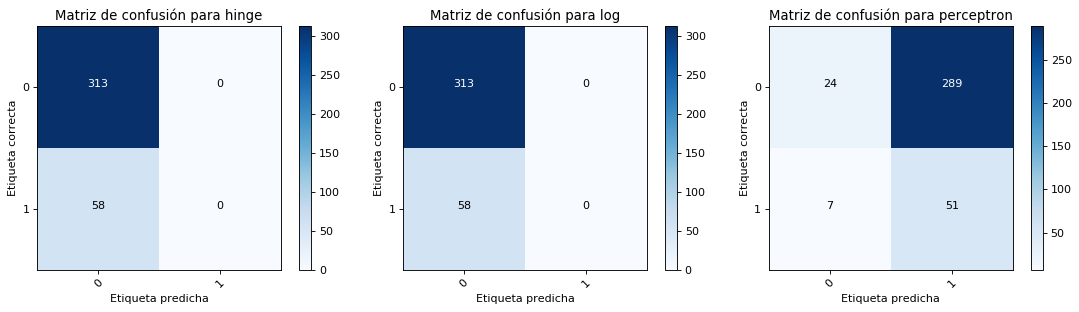

In [14]:
np.random.seed(1)
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, loss in enumerate(('hinge', 'log', 'perceptron'), start=1):
    exploring_params = {
        'learning_rate': ['constant'],
        'eta0': [0.1, 0.01, 0.001],  # Tasa de entrenamiento
        'alpha': [0.1, 0.01, 0.001]  # Tasa de regularización
    }
    m = SGDClassifier(loss=loss, tol=1e-3)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    
    print("# Exploración de hiperparámetros para función de coste \"%s\"" % loss, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")

    plt.subplot(1, 3, idx)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=[0, 1], title="Matriz de confusión para %s" % loss)

## Ejercicio 3: Árbol de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [3]:
from sklearn import tree

Accuracy: 0.889487870619946, Presicion: [0.925      0.66666667], recall: [0.9456869 0.5862069], fscore: [0.93522907 0.62385321], support: [313  58]


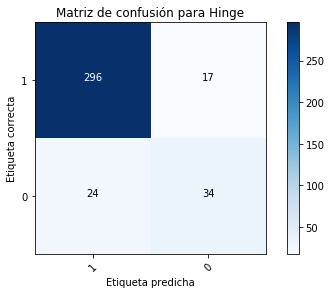

In [4]:
np.random.seed(1)
clf = tree.DecisionTreeClassifier()
#clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=100, shuffle=True)
clf.fit(X_train, y_train)

y_predecido = clf.predict(X_test)

accuracy = len(y_predecido[y_predecido == y_test])/len(y_predecido) 
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predecido)

print("Accuracy: {a}, Presicion: {p}, recall: {r}, fscore: {f}, support: {s}".format(a = accuracy, p = precision, r = recall, f = fscore, s = support))
plot_confusion_matrix(confusion_matrix(y_test, y_predecido),classes=[1, 0], title="Matriz de confusión para Hinge")

In [1]:
# import graphviz 

# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("iris") 

# ot_data = tree.export_graphviz(clf, out_file=None, 
#                       feature_names=dataset.iloc[0,1:],  
#                       class_names=[str(0),str(1)],  
#                       filled=True, rounded=True,  
#                       special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph 

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Mejor conjunto de parámetros:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}

Puntajes de la grilla:

Exactitud: 0.880 (+/-0.000) para los parámetros {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}
Exactitud: 0.876 (+/-0.000) para los parámetros {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}
Exactitud: 0.877 (+/-0.000) para los parámetros {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}
Exactitud: 0.859 (+/-0.000) para los parámetros {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 1}
Exactitud: 0.866 (+/-0.001) para los parámetros {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 5}
Exactitud: 0.876 (+/-0.000) para los parámetros {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 10}
Exactitud: 0.865 (+/-0.001) para los parámetros {'criterion': 'gini', 'max_depth': 1000, 'min_samples_leaf': 1}
Exactitud: 0.866 (+/-0.001) para los parámetros {'criterion': 'gini', 'max_depth': 1000, 'min_samples_leaf

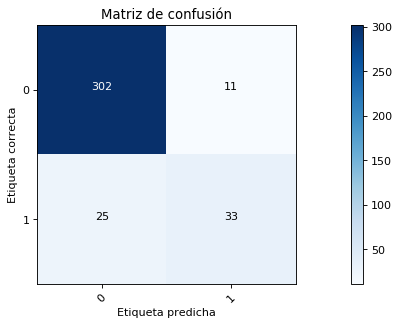

In [8]:
np.random.seed(1)
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

exploring_params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [10, 100, 1000],
    'min_samples_leaf': [1, 5, 10]
}
m = tree.DecisionTreeClassifier()
model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
model.fit(X_train, y_train)

print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")

print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
print()

print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

print("================================================", end="\n\n")

plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=[0, 1], title="Matriz de confusión")